In [18]:
## Importing Libraries
import pandas as pd
import numpy as np
import re
import seaborn as sn
import matplotlib.pyplot as plt
import pickle
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import  CountVectorizer
from sklearn.model_selection import  train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report

import warnings
warnings.simplefilter("ignore")

In [2]:
# Load the  data
data =  pd.read_csv('language_detection.csv')
data.head()

,Text,Language
0,"Nature, in the broadest sense, is the natural...",English
1,"""Nature"" can refer to the phenomena of the phy...",English
2,"The study of nature is a large, if not the onl...",English
3,"Although humans are part of nature, human acti...",English
4,[1] The word nature is borrowed from the Old F...,English


In [3]:
#value count for each lang
data['Language'].value_counts()

Language
English       1385
French        1014
Spanish        819
Portugeese     739
Italian        698
Russian        692
Sweedish       676
Malayalam      594
Dutch          546
Arabic         536
Turkish        474
German         470
Tamil          469
Danish         428
Kannada        369
Greek          365
Hindi           63
Name: count, dtype: int64

In [4]:
# Seprate independent and dependent variables
X = data['Text']
Y = data['Language']

In [6]:
#converting categorical variables to numerical
le = LabelEncoder()
y = le.fit_transform(Y)

In [7]:
## Text preprocessing

data_list = []
for text in X:
    text = re.sub(r'[!@#$(),\n"%^*?\:;~`0-9]', ' ', text)
    text = re.sub(r'[[]]', ' ', text)
    text = text.lower()
    data_list.append(text)

In [9]:
## Bag of words
cv = CountVectorizer()
X = cv.fit_transform(data_list).toarray()

In [10]:
X.shape

(10337, 39404)

In [15]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

In [16]:
## Train and test splits
model = MultinomialNB()
model.fit(x_train, y_train)

MultinomialNB()

In [17]:
y_pred = model.predict(x_test)

In [19]:
ac = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
cr = classification_report(y_test, y_pred)

In [20]:
print('accuracy_score =',ac)

accuracy_score = 0.9714700193423598


In [21]:
print(cr)

              precision    recall  f1-score   support

           0       1.00      0.95      0.98       126
           1       0.99      0.91      0.95        88
           2       1.00      0.98      0.99       122
           3       0.86      1.00      0.92       278
           4       0.98      0.99      0.99       196
           5       1.00      0.97      0.98        94
           6       1.00      0.99      0.99        71
           7       1.00      0.92      0.96        13
           8       0.99      0.96      0.98       144
           9       1.00      0.96      0.98        78
          10       0.98      0.98      0.98       107
          11       0.98      0.99      0.98       143
          12       0.99      0.97      0.98       117
          13       1.00      0.97      0.98       158
          14       0.99      0.97      0.98       140
          15       1.00      0.98      0.99        98
          16       1.00      0.92      0.96        95

    accuracy              

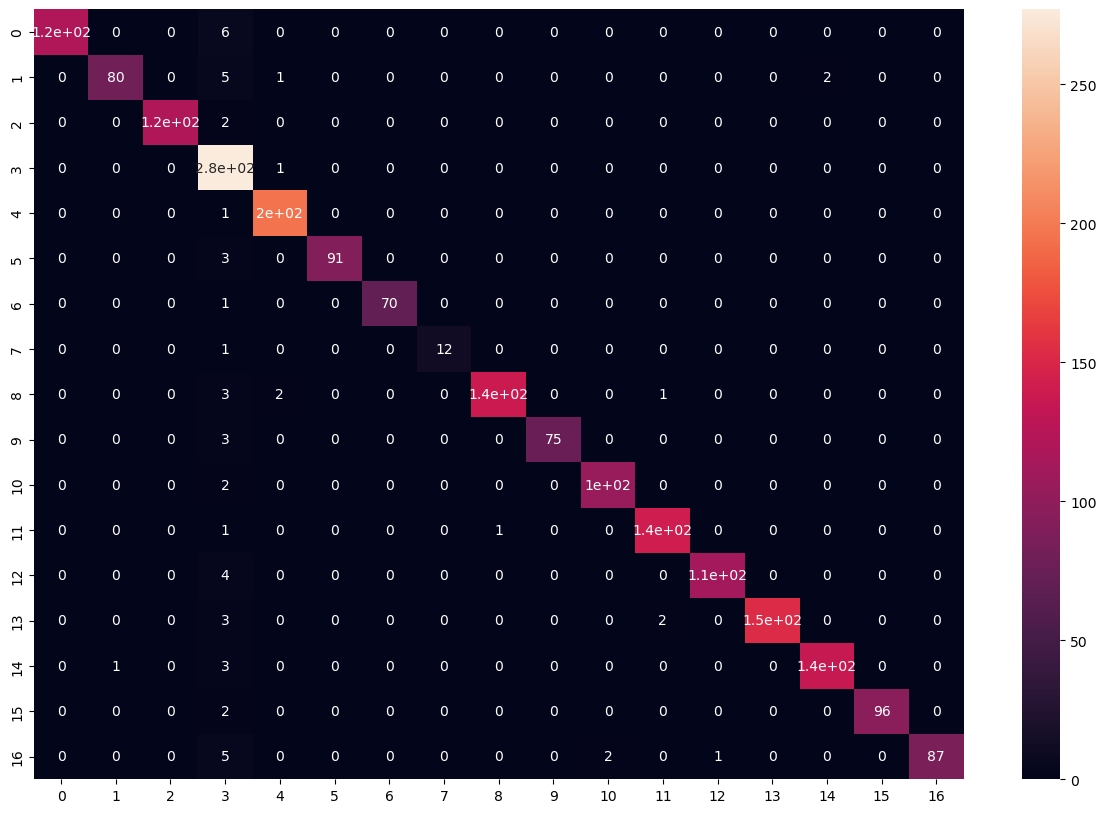

In [22]:
# visulaizing  the confusion matrix
plt.figure(figsize=(15,10))
sn.heatmap(confusion_matrix(y_test, y_pred), annot=True)
plt.show()

In [23]:
#model svaing
pickle.dump(cv, open("transform.pkl","wb"))
pickle.dump(model,open("model.pkl","wb"))